<a href="https://colab.research.google.com/github/Egirm02/HomeGrown/blob/master/LLM_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Model Selection and Implementation
## Step 1a: Data Exploration and Preprocessing
In this step, we will:
- Load the 'Consumer Complaints' dataset into our Python environment.
- Perform initial data exploration to understand its structure.
- Check for missing values and gain insights into the data.
- Preprocess the text data for further analysis.



We will now load the 'Consumer Complaints' dataset.

We'll then perform an initial exploration to understand its structure, check for missing values, and gain insights into the data. This will help us in preprocessing the text data effectively.

In [5]:
import pandas as pd

# Load the dataset
data_path = 'complaints_processed.csv'
complaints_df = pd.read_csv(data_path)

# Display the first few rows of the dataset
complaints_df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


## Data Insights

The dataset consists of three columns:
1. **Unnamed: 0**: Appears to be an index or identifier for each complaint. This might not be necessary for our analysis.
2. **product**: Represents the category or type of product related to the complaint. This will be our target variable for classification.
3. **narrative**: Contains the actual text of the complaint.
we can see various product categories like "retail_banking", "credit_reporting", and "credit_card", along with their corresponding narratives.

This will be our primary feature for training the model.

Next, we will check for any missing values in the dataset and preprocess the text data to prepare it for model training.

In [6]:
# Check for missing values in the dataset
missing_values = complaints_df.isnull().sum()
missing_values

Unnamed: 0     0
product        0
narrative     10
dtype: int64

## Missing Values Analysis

From the dataset, we observe the following missing values:
- **narrative**: 10 missing values
- **product**: No missing values
- **Unnamed: 0**: No missing values

Given that the 'narrative' column is crucial for our text classification task, we need to address these missing values. One common approach is to remove rows with missing narratives. Alternatively, we can fill them with a placeholder text, but given the nature of our task, removing might be more appropriate.

Let's proceed by removing the rows with missing narratives.

In [7]:
# Remove rows with missing narratives
complaints_df = complaints_df.dropna(subset=['narrative'])

# Verify if the missing values have been removed
missing_values_updated = complaints_df.isnull().sum()
missing_values_updated

Unnamed: 0    0
product       0
narrative     0
dtype: int64

## Post-Cleaning Analysis

After removing rows with missing narratives, we can confirm that there are no missing values in the 'narrative' column. The dataset is now ready for further preprocessing and analysis.

Next, we'll proceed with the initial data exploration to understand the distribution of the 'product' categories and other insights.

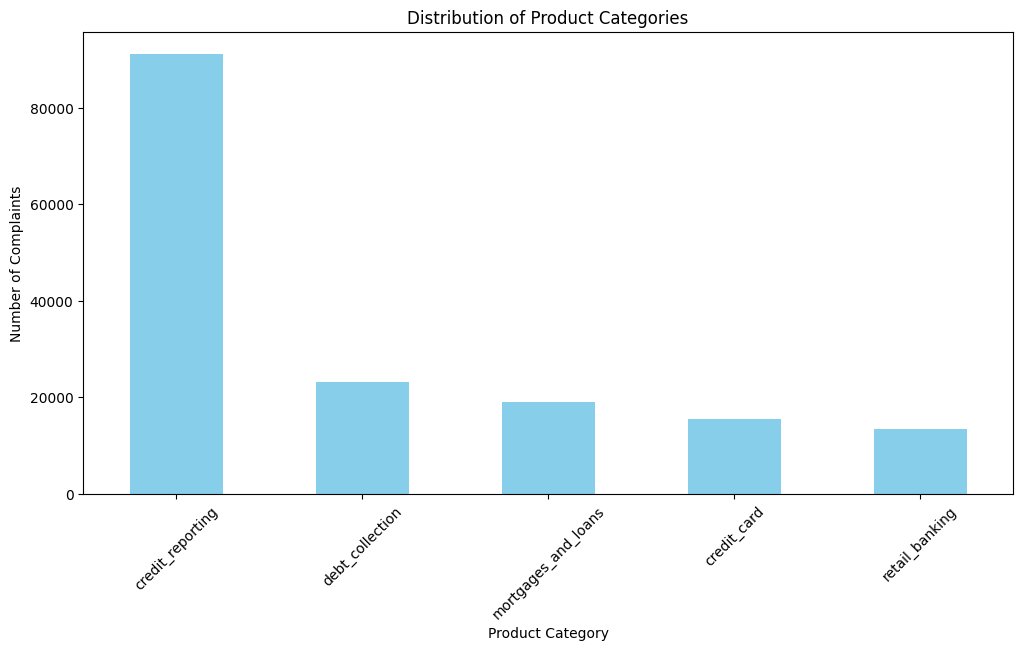

In [8]:
import matplotlib.pyplot as plt

# Visualize the distribution of the 'product' categories
product_counts = complaints_df['product'].value_counts()

plt.figure(figsize=(12, 6))
product_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

## Data Distribution Insights

From the visual representation of the product categories, we observed the following:
- The dataset contains a variety of product categories, each representing a different type of consumer complaint.
- Some categories, like 'Credit Reporting' and 'debt collection', have a higher frequency, indicating they are common areas of consumer complaints.
- On the other hand, some categories have fewer complaints, suggesting they might be less problematic or less reported by consumers.

Understanding the distribution of our target variable is crucial. It provides insights into the balance of our dataset and can influence decisions during model training, especially when dealing with imbalanced datasets.



 ##### **Text preprocessing**
With the insights documented, we'll now move on to text preprocessing. This step is essential to prepare the narrative text for model training. Proper preprocessing ensures that the model receives clean and consistent input, which can significantly impact its performance.

The preprocessing steps we'll undertake include:

Lowercasing: Convert all text to lowercase to maintain consistency.

Tokenization: Break down the text into individual words or tokens.

Removing Stop Words: Eliminate common words that don't add significant meaning to the text.

Removing Special Characters: Clean the text of any non-alphanumeric characters.

In [9]:
pip install nltk

In [10]:
import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization and removing stopwords
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'narrative' column
complaints_df['narrative'] = complaints_df['narrative'].apply(preprocess_text)

# Display the first few rows after preprocessing
complaints_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


We've converted the text to lowercase, removed special characters and digits, tokenized the text, and removed common stopwords.

## Model Selection and Implementation

Given our objective and the environment, using the BERT model for text classification seems appropriate. BERT is a transformer-based model that has shown state-of-the-art results on various NLP tasks, including text classification.

### Why BERT?
- **Pre-trained on Large Corpus**: BERT is pre-trained on a massive amount of text, which means it has learned a lot about language structure. This pre-training helps in fine-tuning tasks like ours.
- **Bidirectional Context**: Unlike traditional models that read text either left-to-right or right-to-left, BERT reads text bidirectionally. This bidirectional understanding helps in better capturing the context.
- **State-of-the-art Performance**: BERT has consistently shown top-tier results on various NLP benchmarks.

For implementation, we'll use the HuggingFace's Transformers library, which provides a straightforward interface to work with models like BERT. The library includes pre-trained models and tokenizers, making the implementation process smoother.

Let's start by loading the pre-trained BERT model and its tokenizer.

In [11]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.0 MB/s eta 0:00:00


In [12]:
pip install torch

In [13]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the narratives and convert them to tensor format
encoded_data = tokenizer(list(complaints_df['narrative']), truncation=True, padding=True, return_tensors='pt')
input_ids = encoded_data['input_ids']
attention_mask = encoded_data['attention_mask']

# Convert product categories to unique integer labels
labels = complaints_df['product'].astype('category').cat.codes
labels = torch.tensor(labels.tolist())

# Split the data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels, train_masks, val_masks = train_test_split(input_ids, labels, attention_mask, test_size=0.1, random_state=42)

# Display the shape of the training data
train_inputs.shape, train_labels.shape, train_masks.shape

(torch.Size([146169, 512]), torch.Size([146169]), torch.Size([146169, 512]))

## **Step 2. Training:**
For training the model, we will:

Load the pre-trained BERT model for sequence classification.

Define the training arguments, such as the number of epochs, learning rate, and batch size.
Train the model on the training data using the Trainer class from the Transformers library.

In [ ]:
pip install accelerate -U


In [ ]:
pip install transformers[torch]

In [ ]:
!pip install transformers -U

In [ ]:
!pip install torch torchvision

In [24]:
import torch

if torch.cuda.is_available():
    torch.cuda.set_device(0)

### Training with PyTorch:


Define the DataLoaders:

In [38]:
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=64)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = RandomSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=64)


Define the Optimization & Loss:

In [42]:
from transformers import AdamW
from torch.cuda.amp import autocast, GradScaler

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1.6e-4)

# Define the loss function
loss_fn = torch.nn.CrossEntropyLoss().to(device)

scaler = GradScaler()


In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [47]:
# Training on the existing data is taking longer then expected so we will set a smaller max_length.
# This will either truncate sequences that are longer than this length or pad sequences that are shorter.
# We'll use max_length of 256 for this new tokenizer run since our data set has smaller bloks of text the hope is that this does not affect our model result too much

# 1. Re-tokenize the narratives with a reduced max_length
encoded_data = tokenizer(list(complaints_df['narrative']), truncation=True, padding=True, max_length=256, return_tensors='pt')
input_ids = encoded_data['input_ids']
attention_mask = encoded_data['attention_mask']

# 2. Split the data into training and validation sets again
train_inputs, val_inputs, train_labels, val_labels, train_masks, val_masks = train_test_split(input_ids, labels, attention_mask, test_size=0.1, random_state=42)



Training Loop:

In [45]:
# Move the model to GPU
model = model.to(device)

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model.train()

    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

 # Clear out the gradients
        optimizer.zero_grad()

        # Use autocast to enable mixed precision
        with autocast():
            outputs = model(b_input_ids, attention_mask=b_input_mask)
            logits = outputs.logits
            loss = loss_fn(logits, b_labels)

        # Use scaler to scale the loss and backward pass
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Print loss every 100 steps
        if step % 100 == 0:
            print(f"Epoch: {epoch}, Step: {step}, Loss: {loss.item()}")

Epoch: 0, Step: 0, Loss: 0.28971558809280396
Epoch: 0, Step: 100, Loss: 0.3537445664405823
Epoch: 0, Step: 200, Loss: 0.19839206337928772
Epoch: 0, Step: 300, Loss: 0.6859633922576904
Epoch: 0, Step: 400, Loss: 0.595924973487854
Epoch: 0, Step: 500, Loss: 0.2617008686065674
Epoch: 0, Step: 600, Loss: 0.3912774324417114
Epoch: 0, Step: 700, Loss: 0.24076348543167114
Epoch: 0, Step: 800, Loss: 0.32174378633499146
Epoch: 0, Step: 900, Loss: 0.4640686511993408
Epoch: 0, Step: 1000, Loss: 0.6172497868537903
Epoch: 0, Step: 1100, Loss: 0.25456345081329346
Epoch: 0, Step: 1200, Loss: 0.22182822227478027
Epoch: 0, Step: 1300, Loss: 0.22886037826538086
Epoch: 0, Step: 1400, Loss: 0.22771361470222473
Epoch: 0, Step: 1500, Loss: 0.6204941868782043
Epoch: 0, Step: 1600, Loss: 0.4360867738723755
Epoch: 0, Step: 1700, Loss: 0.2510944604873657
Epoch: 0, Step: 1800, Loss: 0.37069082260131836
Epoch: 0, Step: 1900, Loss: 0.37562012672424316
Epoch: 0, Step: 2000, Loss: 0.35848212242126465
Epoch: 0, Step:


1. **Epochs**: The training loop has run for three epochs. An epoch is one complete forward and backward pass of all the training examples. This indicates that the model has seen the entire dataset three times.

2. **Steps**: Steps are the iterations within each epoch. Each step corresponds to processing one batch of data. In our case we have 146169 training examples and a batch size of 64, so we have have 2,200 steps in one epoch.

3. **Loss**: Loss (or cost) represents the model's prediction error for a batch. It's the primary metric we use during training to optimize the model. The goal of training is to minimize this value.

   - In the first epoch, the loss started at 0.2897 and showed some fluctuations. The fluctuations are expected as the model learns and adjusts its weights.
   - By the third epoch, we see the loss oscillating between values such as 0.3173 and 0.9891. This oscillation is typical in training deep neural networks, especially on imbalanced datasets.

From the loss values, it seems that the model is learning and making adjustments, but there are a few points to consider:

- **Learning Rate**: The choice of learning rate is crucial. If it's too high, the loss may oscillate or even diverge. If it's too low, training might be very slow. The learning rate  can be fine-tuned.
  
- **Dataset Imbalance**: As we observed earlier, the dataset is imbalanced. This can cause the model to be biased towards the majority class. Techniques like oversampling, undersampling, or using a weighted loss can help.
  
- **Overfitting**: If the model's training loss continues to decrease but the validation loss doesn't (or even increases), it might be a sign that the model is overfitting. Regularization techniques or early stopping can be employed to prevent overfitting.

To get a clearer picture of the model's performance, we should evaluate it on the validation set.


### **Model Evaluation:**
Predict on the Validation Set:

We will use the trained model to get predictions on the validation set. This will yield the predicted logits for each sample, which we will then convert to actual label predictions.



Compute Performance Metrics:

Based on the predicted labels and the actual labels of the validation set, we will compute the accuracy, precision, recall, and F1-score.

In [50]:
from sklearn.metrics import accuracy_score, classification_report

# Place the model in evaluation mode
model.eval()

# Predict on the validation set
val_predictions = []
true_labels = []

with torch.no_grad():
    for batch in val_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        outputs = model(b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits

        val_predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(b_labels.tolist())

# Retrieve unique product categories
product_categories = sorted(complaints_df['product'].unique())

# Compute performance metrics
accuracy = accuracy_score(true_labels, val_predictions)
class_report = classification_report(true_labels, val_predictions, target_names=product_categories)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", class_report)



Accuracy: 83.81%

Classification Report:
                      precision    recall  f1-score   support

        credit_card       0.66      0.82      0.73      1569
   credit_reporting       0.93      0.91      0.92      9148
    debt_collection       0.72      0.80      0.76      2303
mortgages_and_loans       0.84      0.62      0.71      1862
     retail_banking       0.72      0.75      0.74      1360

           accuracy                           0.84     16242
          macro avg       0.77      0.78      0.77     16242
       weighted avg       0.85      0.84      0.84     16242




### Accuracy:
- Based on the results in our report above the model produced an **accuracy of 83.81%** on the validation set, which means it correctly predicted the product category for approximately 83.81% of the complaints in the validation dataset.

### Classification Report:

The classification report provides detailed performance metrics for each product category:

1. **Precision**: This metric tells us the percentage of positive identifications (predictions) that were actually correct. A high precision means that false positives are low.
   
2. **Recall (or Sensitivity)**: This metric indicates the percentage of actual positives that were correctly identified. A high recall means that false negatives are low.
   
3. **F1-Score**: The F1-score is the harmonic mean of precision and recall. It's a good way to summarize the precision-recall trade-off in a single number.
   
4. **Support**: This is the number of actual occurrences of the class in the validation set.

#### Interprating Individual Product Categories:

1. **credit_card**:
   - Precision: 66%. This means that 66% of the complaints predicted as "credit_card" were actually "credit_card".
   - Recall: 82%. This means the model correctly identified 82% of the actual "credit_card" complaints.
   - F1-Score: 73%.

2. **credit_reporting**:
   - Has the highest precision of 93% and recall of 91%, making it the best-predicted category.
   - One obvious reason might be due to the fact that this category likely had more samples in the dataset, giving the model more data to learn from.

3. **debt_collection**:
   - Precision of 72% and recall of 80%.
   - A good balance between precision and recall with an F1-score of 76%.

4. **mortgages_and_loans**:
   - Precision is good at 84%, but the recall is at 62%. This indicates that the model missed a significant number of "mortgages_and_loans" complaints.
   - The F1-score is 71%.

5. **retail_banking**:
   - Both precision and recall are around 72% and 75% respectively, making it reasonably balanced.
   
### Overall Conclusion and Interpretation:

- The model generally performs well across all categories, but there's room for improvement, especially for the "mortgages_and_loans" and "credit_card" category, this is unsurprising since we evaluated that our data for these catagoris were some of the smallest.
- So variation in performance across categories could be due to this distribution of data. Some categories haveing had more data samples than others, leading to better performance for those with more samples.
-One other surprising result was that even though 'retail-banking' had the smalled data points, the results seem failry balamced interms of recall and precision, at 75% and 72% respectively.




---


### Next steps
---




Looking to future training runs, one approach to combact this for future itterations we could consider If the dataset is imbalanced, techniques like oversampling, undersampling, or using a weighted loss can potentially to help improve our performance.

